Task1     Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described

Бимодальное распределение числа UMI на клетку часто связано с несколькими факторами:

1. Некоторые типы клеток могут иметь значительно больше транскриптов, чем другие.
2. Процессы обработки образцов могут влиять на количество обнаруженных UMI.

Анализ разнородности в данных:

1. "Comprehensive Integration of Single-Cell Data" (Nature Biotechnology)
2. "The impact of sequencing depth on single-cell RNA-seq analysis" (Nature Communications)

Task 2
Using Cellxgene Portal please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in loom format and describe the features of such a format.



Формат Loom используется для хранения больших объемов данных о генах и клетках.
Особенности:
1. Иерархическая структура для удобного доступа.
2. Поддержка хранения аннотаций.
3. Хорошая совместимость с Python через библиотеку loompy.

Шаги для проведения QC:
1. Загрузка данных.
2. Проверка основных метрик:
3. Количество генов на клетку.
4. Процент митохондриальных генов.
5. Фильтрация клеток на основе метрик.
6. Сохранение в формате Loom

In [4]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.1 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=45eac0eb1aa3dd2be1b9167bae4c679abaa84c9a3bb4144882844b2055395ec7
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


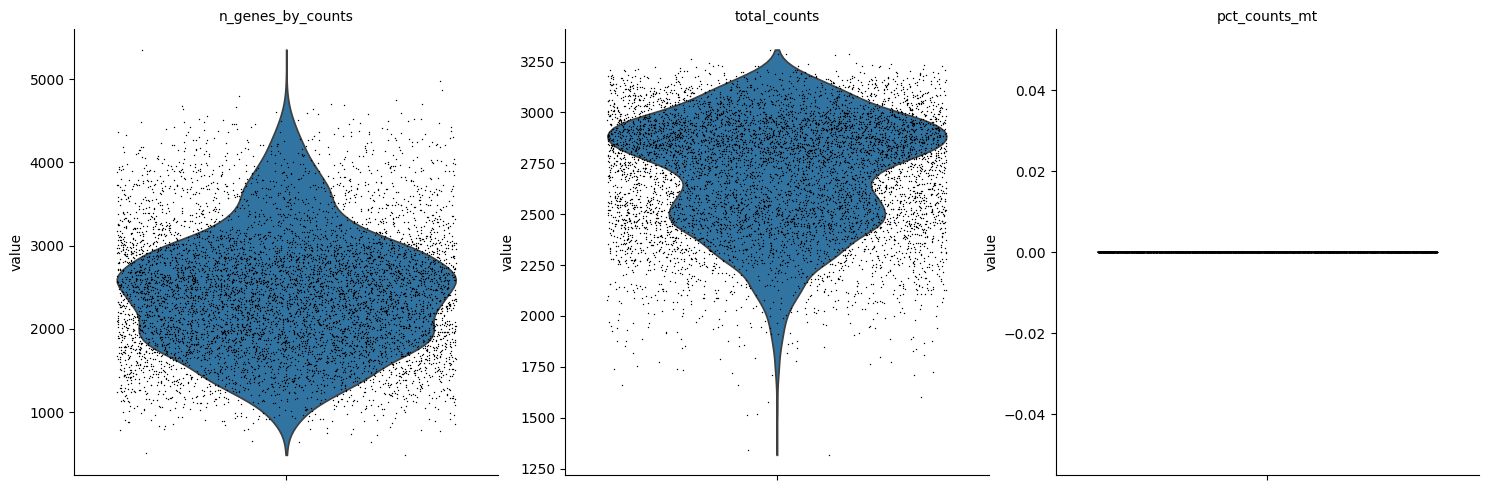

The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


ModuleNotFoundError: No module named 'loompy'

In [7]:
import scanpy as sc

# Загрузка данных
adata = sc.read_h5ad('/content/2c51da04-7223-4cb7-902d-41f79cbc3ec7.h5ad')

# Вычисление метрик QC
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # Обозначение митохондриальных генов
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Визуализация метрик
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# Фильтрация клеток
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, max_genes=2500)
sc.pp.filter_cells(adata, max_counts=10000)
adata = adata[adata.obs['pct_counts_mt'] < 5]

# Сохранение в формате Loom
adata.write_loom('/content/2c51da04-7223-4cb7-902d-41f79cbc3ec7.loom')


print(description)

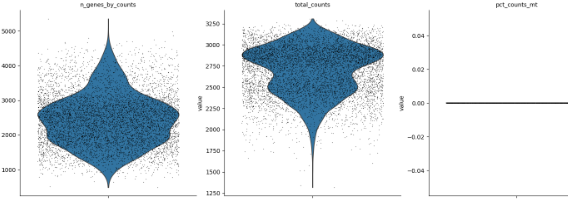